In [ ]:
!gdown --id "17EpkXc8jyonUoLkCNkC9Dg0gVfWpQtWG"

Downloading...
From: https://drive.google.com/uc?id=17EpkXc8jyonUoLkCNkC9Dg0gVfWpQtWG
To: /content/Obesity.csv
100% 232k/232k [00:00<00:00, 93.0MB/s]


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("/content/Obesity.csv")
df.sample(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
1108,Male,19.684891,1.700627,78.048207,yes,no,1.653081,2.753418,Sometimes,no,2.192063,no,1.474937,0.518542,Sometimes,Public_Transportation,0
704,Male,21.000000,1.620000,70.000000,no,yes,2.000000,1.000000,no,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,0
626,Female,18.836315,1.751631,80.000000,yes,yes,2.000000,1.737620,Sometimes,no,2.207978,no,2.641072,0.707044,Frequently,Public_Transportation,0
171,Male,17.580627,1.770324,55.695253,yes,yes,2.000000,4.000000,Sometimes,no,2.369627,no,2.000000,1.612466,no,Automobile,0
1032,Male,17.894784,1.731389,84.064875,yes,no,2.019674,2.843319,Sometimes,no,2.832004,no,1.000000,0.608607,Sometimes,Public_Transportation,0
1875,Female,18.378203,1.746061,128.261402,yes,yes,3.000000,3.000000,Sometimes,no,2.501638,no,1.546179,0.664880,Sometimes,Public_Transportation,1
1421,Female,23.652435,1.562724,80.535698,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.389717,0.000000,no,Public_Transportation,1
1083,Male,23.603191,1.714508,85.137113,yes,yes,2.319776,2.884848,Sometimes,no,2.154898,no,0.325534,0.954216,Sometimes,Public_Transportation,0
1315,Female,21.106056,1.722884,92.949254,yes,yes,1.164062,3.000000,Sometimes,no,1.157395,no,0.000000,0.320851,Sometimes,Public_Transportation,1
58,Male,23.000000,1.882779,64.106108,yes,yes,3.000000,3.000000,Sometimes,no,2.843777,no,1.488843,0.009254,Sometimes,Automobile,0


In [ ]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
Obesity                             int64
dtype: object

In [ ]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Obesity                           0
dtype: int64

In [ ]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object' :
      print(f'{column}  : {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Gender  : ['Male' 'Female']
family_history_with_overweight  : ['yes' 'no']
FAVC  : ['yes' 'no']
CAEC  : ['Sometimes' 'no' 'Frequently' 'Always']
SMOKE  : ['no' 'yes']
SCC  : ['no' 'yes']
CALC  : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS  : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [ ]:
df['Gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)

In [ ]:
cols_yes_no = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for col in cols_yes_no:
  df[col].replace({'yes' : 1, 'no' : 0}, inplace = True)

In [ ]:
print_unique_col_values(df)

CAEC  : ['Sometimes' 'no' 'Frequently' 'Always']
CALC  : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS  : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [ ]:
df1 = df.copy()

In [ ]:
df1 = pd.get_dummies(data =  df1, columns = ['CALC'])
df1 = pd.get_dummies(data =  df1, columns = ['MTRANS'])

In [ ]:
df1 = pd.get_dummies(data =  df1, columns = ['CAEC'])

In [ ]:
print_unique_col_values(df1)

In [ ]:
for column in df1:
  print(f'{column} : {df1[column].unique()}')

Gender : [0 1]
Age : [20.       22.       23.       ... 22.524036 24.361936 23.664709]
Height : [1.76     1.67     1.63     ... 1.752206 1.73945  1.738836]
Weight : [ 55.        50.        45.       ... 133.689352 133.346641 133.472641]
family_history_with_overweight : [1 0]
FAVC : [1 0]
FCVC : [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.371338 2.984

In [ ]:
df1.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
1848,1,25.897815,1.664463,102.781971,1,1,3.00000,3.0,0,1.068493,...,0,0,0,0,1,0,0,0,1,0
414,0,23.000000,1.720000,66.000000,1,1,2.00000,3.0,0,2.000000,...,0,0,0,0,0,1,0,0,1,0
6,1,21.000000,1.520000,42.000000,0,0,3.00000,1.0,0,1.000000,...,0,0,0,0,1,0,0,1,0,0
1751,0,31.199261,1.848845,125.077863,1,1,2.49619,3.0,1,1.662117,...,0,0,0,0,1,0,0,0,1,0
1272,1,38.148845,1.557808,79.661693,1,1,2.00000,3.0,0,1.274774,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

df1[cols_to_scale] = MinMaxScaler().fit_transform(df1[cols_to_scale])

In [ ]:
for column in df1:
  print(f'{column} : {df1[column].unique()}')

Gender : [0 1]
Age : [0.12765957 0.17021277 0.19148936 ... 0.18136247 0.22046672 0.20563211]
Height : [0.58490566 0.41509434 0.33962264 ... 0.5702     0.54613208 0.54497358]
Weight : [0.11940299 0.08208955 0.04477612 ... 0.70663696 0.70407941 0.70501971]
family_history_with_overweight : [1 0]
FAVC : [1 0]
FCVC : [0.5       1.        0.        0.725109  0.9400805 0.50438   0.7982895
 0.7957195 0.6963325 0.0619695 0.513787  0.829056  0.94313   0.8572235
 0.8753575 0.24625   0.6027195 0.529569  0.6552115 0.9115895 0.526466
 0.798182  0.8838655 0.9075785 0.868881  0.7840315 0.762214  0.985787
 0.0408    0.135224  0.172427  0.979829  0.862641  0.9223035 0.72002
 0.716151  0.7961235 0.7246335 0.9649445 0.507629  0.0155745 0.2960915
 0.10749   0.2610005 0.851718  0.681459  0.57042   0.7798    0.668022
 0.406617  0.8621425 0.859485  0.066922  0.378733  0.9896915 0.602457
 0.963609  0.944265  0.9452675 0.765033  0.620803  0.001783  0.8263895
 0.9489495 0.7419895 0.9729835 0.7394455 0.892232  0.

In [ ]:
df1.to_csv("obesitydataset.csv", index = False)

In [ ]:
X = df1.drop('Obesity', axis = 'columns')
y = df1['Obesity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
X_train.shape

(1688, 26)

In [ ]:
X_test.shape

(423, 26)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(20, input_shape = (26,), activation = 'relu'), #hidden layer1
                          keras.layers.Dense(20, activation = 'relu'), #hidden layer2
                          keras.layers.Dense(1, activation = 'sigmoid'), #output layer
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
53/53 [==============================] - 1s 2ms/step - loss: 0.6704 - accuracy: 0.6629
Epoch 2/100
53/53 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7796
Epoch 3/100
53/53 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7950
Epoch 4/100
53/53 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8187
Epoch 5/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8365
Epoch 6/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8620
Epoch 7/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8868
Epoch 8/100
53/53 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.9052
Epoch 9/100
53/53 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9028
Epoch 10/100
53/53 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9254
Epoch 11/

In [ ]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9929


[0.023418502882122993, 0.9929078221321106]

In [ ]:
yp = model.predict(X_test)
yp[:10]

array([[2.5041103e-02],
       [7.2443733e-14],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9954188e-01],
       [1.5444227e-08],
       [1.0172369e-11],
       [1.0000000e+00]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 1, 1, 1, 1, 1, 0, 0, 1]

In [ ]:
y_test[:10]

866     0
217     0
1908    1
1972    1
1849    1
1554    1
1446    1
424     0
247     0
1752    1
Name: Obesity, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       233
           1       1.00      0.98      0.99       190

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423



Text(69.0, 0.5, 'Truth')

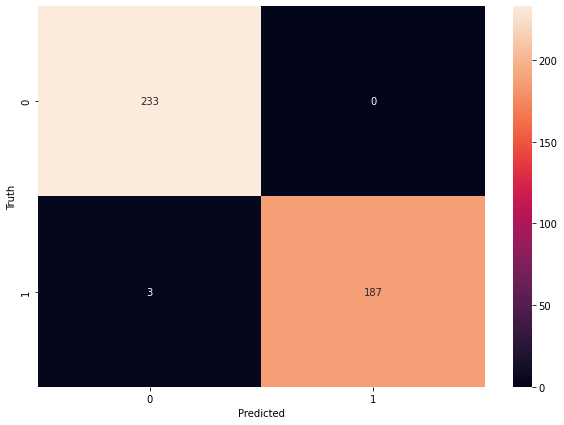

In [ ]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')